# Satisfaction Ratings for Employees Leaving DETE and TAFE

## Introduction
This project looks at the influence of dissatisfaction on the departure of employees from the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. To enable some useful analysis to be carried out, survey data from the respective organisations are cleaned, with a curation of survey questions to focus the scope of the analysis.

The primary objective has been to demonstrate skills in data cleaning and data combination. Some basic initial analysis follows, though there is scope to return to this project and carry out plenty more.

### Data Sources

The sources for [DETE](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey) and [TAFE](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) data sets.

A description of pertinent columns for each data set is as follows:

**DETE Survey**

| Column              | Description                                           |
|---------------------|-------------------------------------------------------|
|  `ID`               |  An id used to identify the participant of the survey |
|  `SeparationType`   |  The reason why the person's employment ended         |
|  `Cease Date`       |  The year or month the person's employment ended      |
|  `DETE Start Date`  |  The year the person began employment with the DETE   |

**TAFE Survey**

| Column | Description |
|--------|-------------|
|  `Record ID` |  An id used to identify the participant of the survey |
|  `Reason for ceasing employment` |  The reason why the person's employment ended |
|  `LengthofServiceOverall. Overall Length of Service at Institute (in years)` |  The length of the person's employment (in years) |

## Initial Exploration

### DETE Survey

In [1]:
# import data
import numpy as np
import pandas as pd
dete_survey = pd.read_csv('./dete_survey.csv')
tafe_survey = pd.read_csv('./tafe_survey.csv')

# initial data exploration
print('DETE survey info:')
print(dete_survey.info())

DETE survey info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sect

In [2]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
print(dete_survey['SeparationType'].value_counts())

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64


Preliminary observations of the DETE survey:

- No empty entries for 'SeparationType', 'Cease Date', 'DETE Start Date'.
    - While they are all non-null, a number of 'DETE Start Date' entries are 'Not Stated'.
    - This data set can be re-imported or modified in the DataFrame to classify 'Not Stated' entries as null.
- There are a number of boolean columns that may be useful for generating an overall dissatisfaction category as a contributing factor for employees leaving.
- A number of other columns have significant or extensive null entries, such as 'Business Unit'; these are not likely to be in the scope of this project.
- 'SeparationType' appears to be entries from a common list (perhaps from a dropdown list on the survey itself).
- Survey questions appear to have been given simple column names, with either boolean entries or 'Null,SD,D,N,A,SA' to represent not answered or answered with the degree of agreement with the survey question statement.
- 'Age' is categorised into defined buckets, in 5-year increments, one single category for under 20, and one single category for above 60.

### TAFE Survey

In [4]:
print('\nTAFE survey info:')
print(tafe_survey.info())


TAFE survey info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                               

In [5]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [6]:
print('TAFE length of service categorisation:\n', tafe_survey['LengthofServiceOverall. Overall Length of Service at Institute (in years)'].value_counts(dropna=False))

TAFE length of service categorisation:
 Less than 1 year      147
NaN                   106
1-2                   102
3-4                    96
11-20                  89
More than 20 years     71
5-6                    48
7-10                   43
Name: LengthofServiceOverall. Overall Length of Service at Institute (in years), dtype: int64


Preliminary observations of the TAFE survey:

- There appears to be a column for each survey question that was asked.
- All contributing factor options are given their own column, with column entries either being null or '-' to represent not selected, or the name of the contributing factor to represent selected. This style is used for what appear to be "select multiple" type survey questions.
- Survey questions asking for level of agreement to statements contain expanded rather than abbreviated string entries compared to the DETE data (e.g. 'Strongly Disagree' vs 'SD')
- 'Age' is similarly categorised as in the DETE data, but with one category for over 55, and some variety in how the bucket is entered (e.g. '40-45' can be entered as '40 45')
- Length of service, both overall and in current role, are categorised as shown above, and 15% of entries are null.

## Data Cleaning

### Focus Scope of Data Import

In [7]:
# re-import DETE data to include 'Not Stated' entries as nan
dete_survey = pd.read_csv('./dete_survey.csv', na_values='Not Stated')
dete_survey_updated = dete_survey.drop(columns=dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(columns=tafe_survey.columns[17:66], axis=1)

Individual survey answers are not needed for this analysis, so those columns have been dropped. In addition, the DETE survey data has been re-imported, with 'Not Stated' values imported as null.

### Tidy Up Column Names

In [8]:
# clean up DETE column names
dete_columns = dete_survey_updated.columns.str.strip().str.replace('\s+', '_').str.replace('/', '_').str.lower()
#print(dete_columns)
dete_survey_updated.columns = dete_columns
print('DETE head:\n', dete_survey_updated.head())

# clean up TAFE column names
tafe_cols = {
    'Record ID': 'id',
    'CESSATION YEAR': 'cease_date',
    'Reason for ceasing employment': 'separationtype',
    'Gender. What is your Gender?': 'gender',
    'CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
}
tafe_survey_updated = tafe_survey_updated.rename(columns=tafe_cols)
print('\nTAFE head:\n', tafe_survey_updated.head())

DETE head:
    id                    separationtype cease_date  dete_start_date  \
0   1             Ill Health Retirement    08/2012           1984.0   
1   2  Voluntary Early Retirement (VER)    08/2012              NaN   
2   3  Voluntary Early Retirement (VER)    05/2012           2011.0   
3   4         Resignation-Other reasons    05/2012           2005.0   
4   5                    Age Retirement    05/2012           1970.0   

   role_start_date                                      position  \
0           2004.0                                Public Servant   
1              NaN                                Public Servant   
2           2011.0                               Schools Officer   
3           2006.0                                       Teacher   
4           1989.0  Head of Curriculum/Head of Special Education   

  classification              region                      business_unit  \
0        A01-A04      Central Office  Corporate Strategy and Peformance   
1 

Column names have been simplified and will be standardised between the two surveys so that they can be joined together into one data set.

### Extract Rows Where Employees Resigned

The primary interest is in the employees who resigned from their respective organisation.

In [9]:
print('DETE separationtype entries:\n', dete_survey_updated['separationtype'].value_counts())
print('\nTAFE separationtype entries:\n', tafe_survey_updated['separationtype'].value_counts())

dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.contains('Resignation')].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()
print('\nDETE resignation entries:\n', dete_resignations['separationtype'].value_counts())
print('\nTAFE resignation entries:\n', tafe_resignations['separationtype'].value_counts())

DETE separationtype entries:
 Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

TAFE separationtype entries:
 Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

DETE resignation entries:
 Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

TAFE resignation entries:
 Resignation    340
Name: separationtype, dtype: int64


### Derive Service Length for DETE Employees

In [10]:
# pick out just the resignation years from DETE survey cease_date column
# print(dete_resignations['cease_date'].value_counts(dropna=False))
dete_cease_date_cleaned = dete_resignations['cease_date'].str.extract(r'(2[0-9]{3})').astype(float)
dete_resignations['cease_date'] = dete_cease_date_cleaned
print('DETE start date:\n', dete_resignations['dete_start_date'].value_counts(dropna=False).sort_index())
print('DETE cease date:\n', dete_resignations['cease_date'].value_counts(dropna=False).sort_index())

print('\nTAFE cease date:\n', tafe_resignations['cease_date'].value_counts(dropna=False).sort_index())

DETE start date:
 1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
NaN       28
Name: dete_start_date, dtype: int64
DETE cease date:
 2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
NaN        11
Name: cease_date, dtype: int64

TAFE cease date:
 2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
NaN         5
Name: cease_date, dtype: int64


A very large number of people leaving DETE in 2012 and 2013. Similarly, a large number of people resigning from TAFE between 2010-2013.

In [11]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
print(dete_resignations['institute_service'].value_counts(dropna=False).sort_index())

0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
NaN     38
Name: institute_service, dtype: int64


`institute_service` column added to determine number of years' service with DETE. 38 entries (12%) are null due to missing start or cease date data.

### Job Dissatisfaction Columns

In [12]:
print('TAFE contributing factors: "Dissatisfaction"\n', tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False))
print('\nTAFE contributing factors: "Job Dissatisfaction"\n', tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False))

def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True

tafe_cols = ['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']
transformed_tafe_cols = tafe_resignations[tafe_cols].applymap(update_vals)
print('\nCleaned TAFE contributing factors: "Dissatisfaction"\n', transformed_tafe_cols['Contributing Factors. Dissatisfaction'].value_counts(dropna=False))
print('\nCleaned TAFE contributing factors: "Job Dissatisfaction"\n', transformed_tafe_cols['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False))
for col in tafe_cols:
    tafe_resignations[col] = transformed_tafe_cols[col]

TAFE contributing factors: "Dissatisfaction"
 -                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

TAFE contributing factors: "Job Dissatisfaction"
 -                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

Cleaned TAFE contributing factors: "Dissatisfaction"
 False    277
True      55
NaN        8
Name: Contributing Factors. Dissatisfaction, dtype: int64

Cleaned TAFE contributing factors: "Job Dissatisfaction"
 False    270
True      62
NaN        8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


'Dissatisfaction' and 'Job Dissatisfaction' columns have been transformed into boolean/null entries with the above code.

In [13]:
dete_cols = [
    'job_dissatisfaction',
    'dissatisfaction_with_the_department',
    'physical_work_environment',
    'lack_of_recognition',
    'lack_of_job_security',
    'work_location',
    'employment_conditions',
    'work_life_balance',
    'workload'
]
dete_dissatisfied = dete_resignations[dete_cols].any(axis=1)
print(dete_dissatisfied.value_counts(dropna=False))
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'] = dete_dissatisfied

tafe_dissatisfied = tafe_resignations[tafe_cols].any(axis=1)
print(tafe_dissatisfied.value_counts(dropna=False))
tafe_resignations_up = tafe_resignations.copy()
tafe_resignations_up['dissatisfied'] = tafe_dissatisfied

False    162
True     149
dtype: int64
False    249
True      91
dtype: int64


Factors influencing dissatisfaction in the job have been collated for each survey. For any dissatisfaction factor that has been indicated as True, the entry in the respective new `dissatisfied` column has been marked as True to reflect that some dissatisfaction influenced a given employee's resignation.

### Combining the Two Surveys

In [14]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'
combined = pd.concat([dete_resignations_up, tafe_resignations_up])
combined_updated = combined.dropna(axis=1, thresh=500)

A new column named `institute` has been added to each DataFrame; the two have then been concatenated together.

### Categorising Service Lengths

Service lengths from the `institute_service` column are cleaned below, so that they can then be categorised into a new `service_cat` column. The categories are as follows:
- New: <3 years
- Experienced: 3-7 years
- Established: 7-10 years
- Veteran: >10 years

In [15]:
institute_service = combined_updated['institute_service'].astype(str).str.strip()
print(institute_service.value_counts(dropna=False))
str_replacements = {
    'Less than 1 year' : '1',
    '11-20' : '15',
    '1-2' : '2',
    '3-4' : '4',
    '5-6' : '6',
    '7-10' : '10',
    'More than 20 years' : '20'
}
for item in str_replacements:
    institute_service = institute_service.str.replace(item, str_replacements[item])
print(institute_service.value_counts(dropna=False))
combined_updated['institute_service'] = institute_service.astype(float)

nan                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
14.0                   6
10.0                   6
22.0                   6
17.0                   6
12.0                   6
16.0                   5
18.0                   5
23.0                   4
11.0                   4
24.0                   4
19.0                   3
32.0                   3
39.0                   3
21.0                   3
36.0                   2
28.0                   2
25.0                   2
26.0                   2
30.0                   2


In [16]:
def cat_service(val):
    if pd.isnull(val):
        return np.nan
    elif val < 3:
        return 'New'           # <3 years at company
    elif 3 <= val < 7:
        return 'Experienced'   # 3-6 years at company
    elif 7 <= val < 10:
        return 'Established'   # 7-10 years at company
    else:
        return 'Veteran'       # 11 or more years at company
service_cat = combined_updated['institute_service'].apply(cat_service)
print(service_cat.value_counts(dropna=False))
combined_updated['service_cat'] = service_cat

New            193
Experienced    172
Veteran        163
NaN             88
Established     35
Name: institute_service, dtype: int64


## Analysing Influence of Dissatisfaction

Below is some very quick analysis of the frequency of dissatisfaction being cited as a reason for resigning from one of the two institutions explored in this project. There is so much more that could be done, but the focus for now has been on applying various techniques to clean and combine a couple of data sets for analysis. I may decide to pick this back up in the future to expand this section and do some deeper exploration of the influence of dissatisfaction on resignations.


False    411
True     240
Name: dissatisfied, dtype: int64


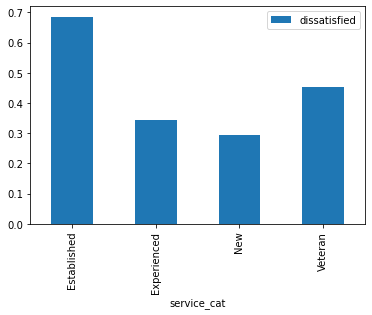

In [17]:
print(combined_updated['dissatisfied'].value_counts(dropna=False))
diss_agg = combined_updated.pivot_table(index='service_cat', values='dissatisfied')

import matplotlib.pyplot as plt
%matplotlib inline
diss_agg.plot(kind='bar')
plt.show()

There is a generally a significant influence of dissatisfaction in the reason for employees to resign from these institutions. Interestingly, those that have served longer are more likely to cite dissatisfaction as a contributing factor to their resignation, with established employees (7-10 years) most likely to have resigned as a result of dissatisfaction.